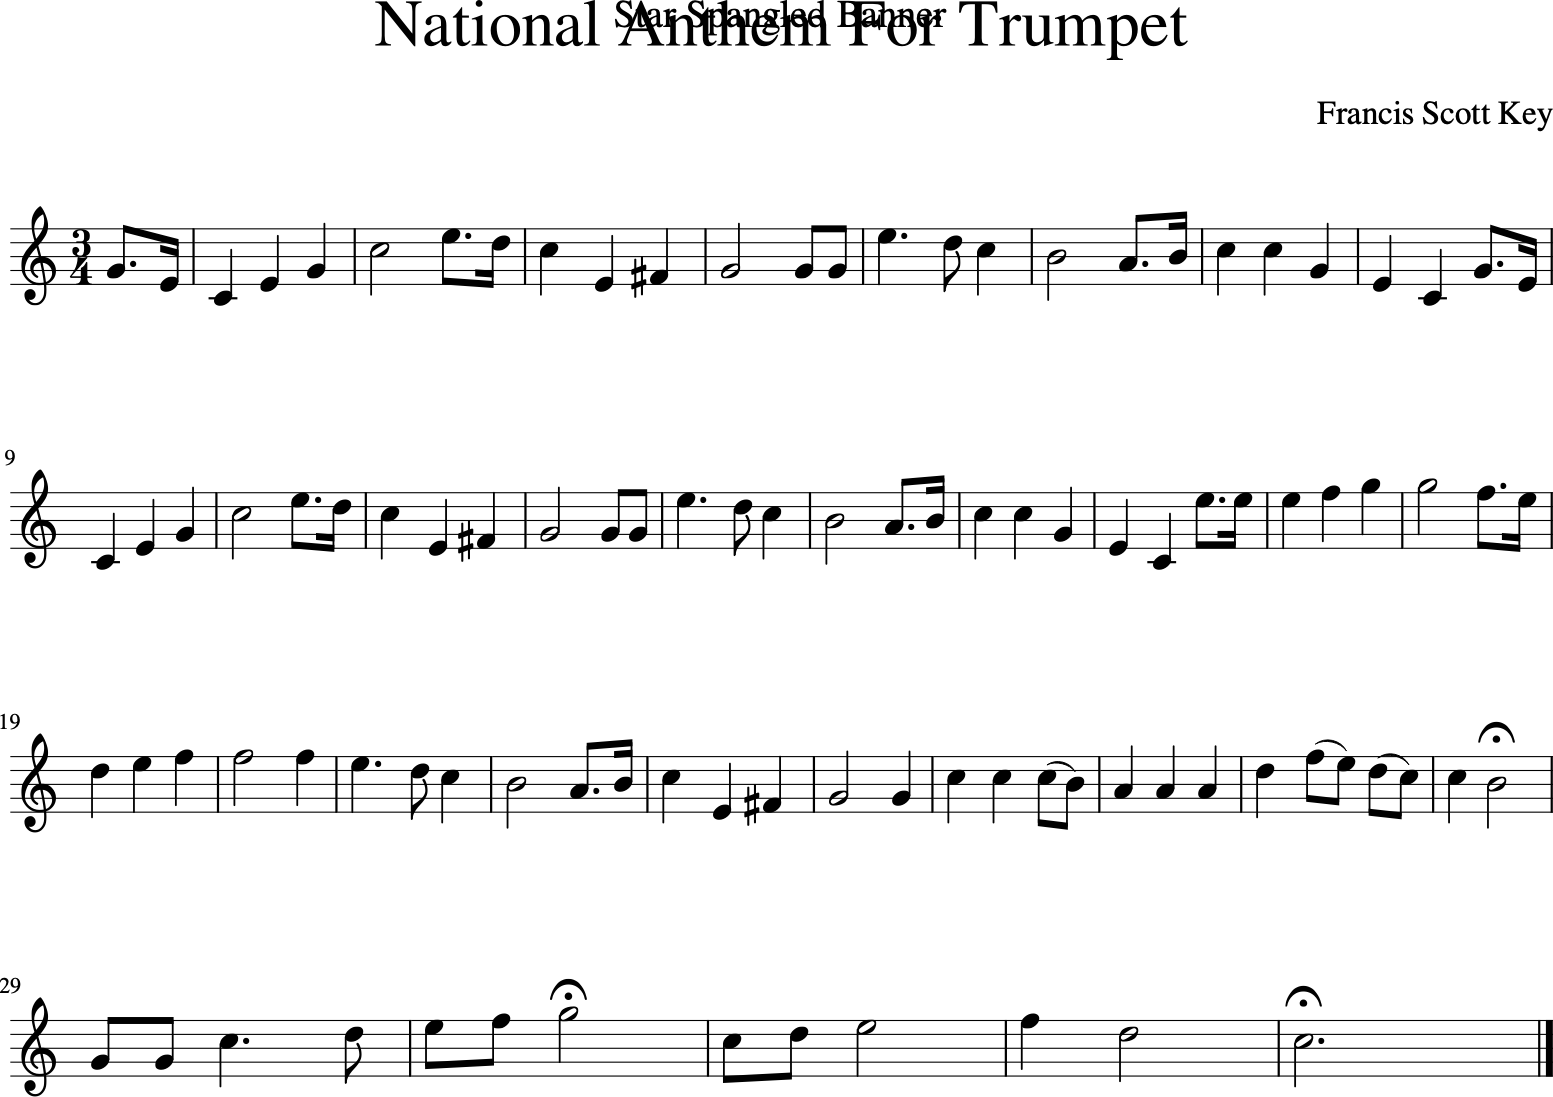

In [2]:
from music21 import *

b = converter.parse('/Users/sagewong/git/SightReadingMusicGenerator/national-anthem-for-trumpet.mxl')
b.show()

In [47]:
def stepDirectionAndLength(currNote, prevNote):
    if len(currNote) == 2:
        currLetter = currNote[0]
        currVal = (ord(currLetter) - 65) + int(currNote[1])*7
    elif len(currNote) == 3:
        currLetter = currNote[0]
        currAccidental = currNote[1]
        if currAccidental == "#":
            currVal = (ord(currLetter) - 65) + int(currNote[2])*7 + 0.5
        else:
            currVal = (ord(currLetter) - 65) + int(currNote[2])*7 - 0.5

    if len(prevNote) == 2:
        prevLetter = prevNote[0]
        prevVal = (ord(prevLetter) - 65) + int(prevNote[1])*7
    elif len(prevNote) == 3:
        prevLetter = prevNote[0]
        prevAccidental = prevNote[1]
        if prevAccidental == "#":
            prevVal = (ord(prevLetter) - 65) + int(prevNote[2])*7 + 0.5
        else:
            prevVal = (ord(prevLetter) - 65) + int(prevNote[2])*7 - 0.5

    if currVal > prevVal:
        stepDirection = 1
    elif currVal < prevVal:
        stepDirection = -1
    else:
        stepDirection = 0
    
    stepLength = currVal - prevVal
    return stepDirection, stepLength

previousNote = ''

allStepDirections = []
allStepLengths = []
allQuarterLengths = []

for n in b.recurse().notes:
    print(n.nameWithOctave, n.quarterLength)
    currentNote = n.nameWithOctave
    if previousNote != '':
        print(currentNote)
        stepDirection, stepLength = stepDirectionAndLength(currentNote, previousNote)
        allStepDirections.append(stepDirection)
        allStepLengths.append(stepLength)
        allQuarterLengths.append(n.quarterLength)
        print(f"step direction: {stepDirection}")
        print(f"step length: {stepLength}")

    previousNote = n.nameWithOctave

G4 0.75
E4 0.25
E4
step direction: -1
step length: -2
C4 1.0
C4
step direction: -1
step length: -2
E4 1.0
E4
step direction: 1
step length: 2
G4 1.0
G4
step direction: 1
step length: 2
C5 2.0
C5
step direction: 1
step length: 3
E5 0.75
E5
step direction: 1
step length: 2
D5 0.25
D5
step direction: -1
step length: -1
C5 1.0
C5
step direction: -1
step length: -1
E4 1.0
E4
step direction: -1
step length: -5
F#4 1.0
F#4
step direction: 1
step length: 1.5
G4 2.0
G4
step direction: 1
step length: 0.5
G4 0.5
G4
step direction: 0
step length: 0
G4 0.5
G4
step direction: 0
step length: 0
E5 1.5
E5
step direction: 1
step length: 5
D5 0.5
D5
step direction: -1
step length: -1
C5 1.0
C5
step direction: -1
step length: -1
B4 2.0
B4
step direction: -1
step length: -8
A4 0.75
A4
step direction: -1
step length: -1
B4 0.25
B4
step direction: 1
step length: 1
C5 1.0
C5
step direction: 1
step length: 8
C5 1.0
C5
step direction: 0
step length: 0
G4 1.0
G4
step direction: -1
step length: -3
E4 1.0
E4
step 

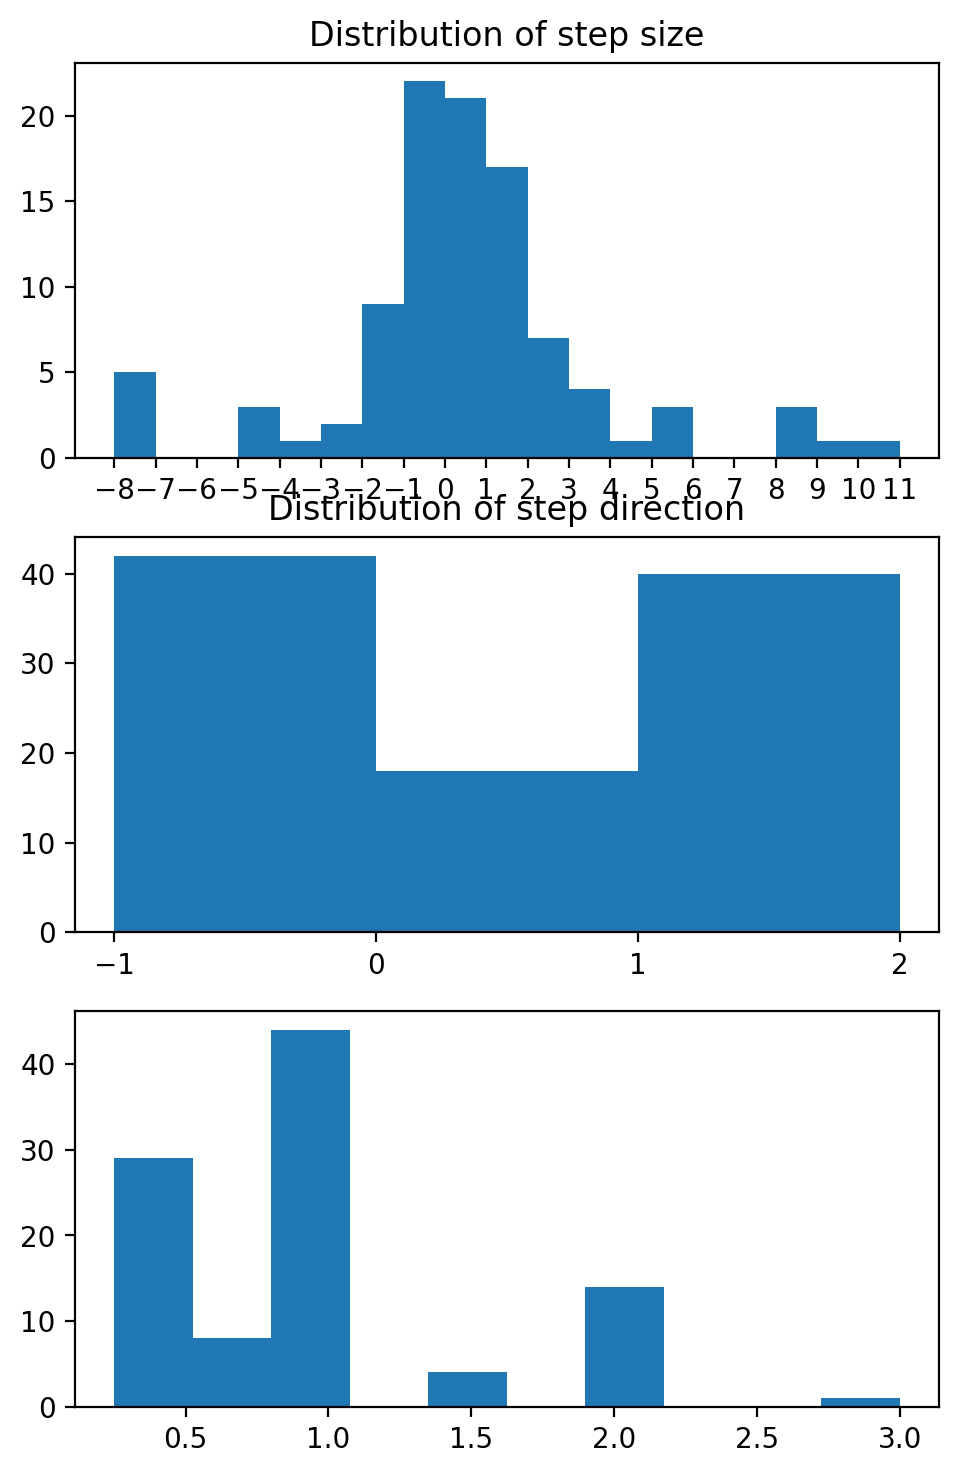

In [48]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1)

allStepLengthsArray = np.array(allStepLengths)
allStepDirectionsArray = np.array(allStepDirections)
allQuarterLengthsArray = np.array(allQuarterLengths)

axes[0].set_xticks(range(-10, 12))
axes[0].hist(allStepLengthsArray, bins=[i for i in range(int(np.min(allStepLengthsArray)), int(np.max(allStepLengthsArray)) + 2)])
axes[0].set_title("Distribution of step size")

axes[1].set_xticks(range(-10, 10))
axes[1].hist(allStepDirectionsArray, bins=[i for i in range(int(np.min(allStepDirectionsArray)), int(np.max(allStepDirectionsArray)) + 2)])
axes[1].set_title("Distribution of step direction")

axes[2].hist(allQuarterLengthsArray)

plt.subplots_adjust(bottom=0.1, right=0.8, top=1.5)

In [55]:
def elementPercentChance(arr):
    emptyDict = {}
    arr = list(arr)
    arrLen = len(arr)
    while len(arr) > 0:
        elementToCount = arr[0]
        howManyOccurrences = 0
        index = 0
        while index < len(arr):
            if arr[index] == elementToCount:
                arr.pop(index)
                index -= 1
                howManyOccurrences += 1
            index += 1
        emptyDict.update({elementToCount:howManyOccurrences/arrLen})
    return emptyDict

stepLengthChanceDict = elementPercentChance(allStepLengthsArray)
stepDirectionChanceDict = elementPercentChance(allStepDirectionsArray)
quarterLengthsChanceDict = elementPercentChance(allQuarterLengthsArray)
print(quarterLengthsChanceDict)
quarterLengthsChanceDict.pop(0.25)

{0.25: 0.09, 1.0: 0.44, 2.0: 0.14, 0.75: 0.08, 0.5: 0.2, 1.5: 0.04, 3.0: 0.01}


0.09

In [62]:
import random
from music21 import stream, note, metadata

s = stream.Score()
s.insert(0, metadata.Metadata())
s.metadata.title = "Sight Reading Music Generator"
s.metadata.composer = "Sage Wong"

p = stream.Part()

def generateListOfNotes():
    listONotes = []
    for octave in range(1, 8):
        for note in ['C', 'D', 'E', 'F', 'G', 'A', 'B']:
            listONotes.append(note + str(octave))
    return listONotes

def restrainPossibleNotes(ListOfNotes, first, last):
    firstNoteIndex = ListOfNotes.index(first)
    lastNoteIndex = ListOfNotes.index(last)
    return ListOfNotes[firstNoteIndex:(lastNoteIndex + 1)]

def randomlySelect(chanceDict):
    keys = list(chanceDict.keys())
    vals = list(chanceDict.values())

    return random.choices(keys, weights=vals)[0]

ListONotes = restrainPossibleNotes(generateListOfNotes(), "C4", "G5")

currIndex = 10
# Starting on C4
notesToGenerate = 100

previousQuarterLength = 0

timeTracker = 0
timeUsing = 4

for i in range(notesToGenerate):
    stepLength = int(randomlySelect(stepLengthChanceDict))
    stepDirection = int(randomlySelect(stepDirectionChanceDict))
    quarterLength = randomlySelect(quarterLengthsChanceDict)
    currIndex += stepLength * stepDirection

    if currIndex > len(ListONotes) - 1:
        currIndex = ListONotes.index(random.choice(ListONotes))
    elif currIndex < 0:
        currIndex = ListONotes.index(random.choice(ListONotes))
    if previousQuarterLength == 0.75:
        quarterLength = 0.25
    if timeTracker + quarterLength > timeUsing:
        quarterLength = timeUsing - timeTracker
    if quarterLength == 0.75 and timeTracker % 1 != 0:
        quarterLength = 0.5
    print(ListONotes[currIndex], stepLength, stepDirection, quarterLength)
    p.append(note.Note(ListONotes[currIndex], quarterLength=quarterLength))
    timeTracker += quarterLength
    if timeTracker == 4:
        timeTracker = 0
    previousQuarterLength = quarterLength

print(ListONotes)

s.append(p)
s.write("musicxml", fp="output.xml")


E5 1 -1 0.5
E5 0 1 0.5
D5 1 -1 1.0
G5 3 1 0.75
F5 -1 1 0.25
D5 2 1 0.5
F4 -5 1 0.5
F4 0 0 1.0
F4 -1 0 1.0
A4 -4 1 2.0
B4 -1 -1 1.0
A4 -1 1 1.0
A4 0 1 1.5
B4 -1 -1 0.5
B4 -2 0 0.75
B4 0 1 0.25
D5 -2 -1 1.0
C5 -1 1 2.0
A4 -2 1 0.5
C5 2 1 2.0
C5 0 -1 1.5
F5 -3 -1 1.0
A4 -5 1 1.5
E5 4 1 1.0
E5 0 -1 0.5
B4 5 1 0.75
E5 10 -1 0.25
D5 1 -1 2.0
D5 10 0 1.0
B4 -2 1 2.0
G4 -2 1 1.0
B4 -2 -1 1.0
A4 -1 1 2.0
G4 -1 1 1.0
F4 1 -1 1.0
F4 1 0 1.0
G5 8 1 1.0
E5 -2 1 1.0
C5 -2 1 1.0
D5 -1 -1 2.0
D5 0 0 0.5
C5 -1 1 0.5
C5 0 1 1.0
B4 1 -1 0.5
F4 -8 1 1.0
G5 -8 -1 1.0
G5 0 -1 1.0
G5 1 0 0.5
G5 0 1 0.5
G5 3 0 1.0
B4 3 1 0.5
G4 -2 1 1.0
G4 5 0 1.0
G4 -8 0 2.0
G4 -2 0 1.0
E4 -2 1 1.0
E4 1 0 1.0
E4 5 0 1.0
G4 -5 1 1.0
E4 -2 1 1.0
E4 0 -1 2.0
E4 0 -1 1.0
C4 2 -1 1.0
D4 1 1 0.5
C5 -8 1 1.0
D5 -1 -1 0.5
D5 -1 0 1.0
D5 -5 0 1.0
D5 0 0 1.0
E5 -1 -1 0.75
D5 1 -1 0.25
C5 1 -1 1.5
A4 2 -1 0.5
A4 -8 0 1.0
C5 -2 -1 1.0
C5 0 0 2.0
B4 -1 1 0.5
B4 -1 0 1.0
C5 1 1 1.0
B4 -1 1 1.0
C5 -1 -1 0.5
E5 -2 -1 1.0
G5 2 1 0.5
F5 -1 1 

PosixPath('/Users/sagewong/git/SightReadingMusicGenerator/output.xml')